In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import re

with open("Diablo_IV_Patch_Notes.html", "r", encoding="utf-8") as f:
    soup = BeautifulSoup(f, "html.parser")

data = []

panels = soup.find_all("div", class_="panel")

for panel in panels:
    
    # Extract version/build from panel-title
    title_div = panel.find("div", class_="panel-title")
    if not title_div:
        continue
    
    title_text = title_div.get_text(strip=True)
    
    # Extract version (e.g., 2.5.3)
    version_match = re.search(r"\d+\.\d+\.\d+", title_text)
    version = version_match.group(0) if version_match else "UNKNOWN"
    
    # Extract build number
    build_match = re.search(r"Build\s+#?(\d+)", title_text)
    build = build_match.group(1) if build_match else "UNKNOWN"
    
    # Extract panel body
    body = panel.find("div", class_="panel-body")
    if not body:
        continue
    
    # Extract all bullet points within this patch
    bullets = body.find_all("li")
    
    for idx, li in enumerate(bullets):
        text = li.get_text(separator=" ", strip=True)
        if text:
            data.append({
                "version": version,
                "build": build,
                "bullet_text": text
            })

df_bullets = pd.DataFrame(data)

print("Total bullets extracted:", len(df_bullets))
df_bullets.head()

Total bullets extracted: 863


,version,build,bullet_text
0,2.5.3,70356,Fixed an issue where the Executioner Monster A...
1,2.5.3,70356,Fixed an issue where certain Silent Chests in ...
2,2.5.3,70356,Fixed an issue where Zagraal in the Dark Citad...
3,2.5.3,70356,Fixed an issue where some Tower bosses had sig...
4,2.5.3,70356,Fixed an issue where an error would occur when...


In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import re

# Load HTML
with open("Diablo_IV_Patch_Notes.html", "r", encoding="utf-8") as f:
    soup = BeautifulSoup(f, "html.parser")

data = []

# Each patch is inside a div.panel
panels = soup.find_all("div", class_="panel")

for panel in panels:

    # --- Extract Title Block ---
    title_div = panel.find("div", class_="panel-title")
    if not title_div:
        continue

    title_text = title_div.get_text(strip=True)

    # --- Extract Version ---
    version_match = re.search(r"\d+\.\d+\.\d+", title_text)
    version = version_match.group(0) if version_match else "UNKNOWN"

    # --- Extract Build ---
    build_match = re.search(r"Build\s+#?(\d+)", title_text)
    build = build_match.group(1) if build_match else "UNKNOWN"

    # --- Extract Date (embedded in title text) ---
    date_match = re.search(
        r"(January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}",
        title_text
    )
    date = date_match.group(0) if date_match else "UNKNOWN"

    # --- Extract Patch Body ---
    body = panel.find("div", class_="panel-body")
    if not body:
        continue

    # Extract true bullet points
    bullets = body.find_all("li")

    for li in bullets:
        text = li.get_text(separator=" ", strip=True)

        if text:
            data.append({
                "version": version,
                "build": build,
                "date": date,
                "bullet_text": text
            })

# Create DataFrame
df_bullets = pd.DataFrame(data)

print("Total bullets extracted:", len(df_bullets))

# Verify structure
display(
    df_bullets[["version", "build", "date"]]
    .drop_duplicates()
    .sort_values("version")
)

Total bullets extracted: 863


,version,build,date
127,2.5.0,69713,"December 11, 2025"
91,2.5.1,69864,"December 18, 2025"
11,2.5.2,70156,"January 12, 2026"
0,2.5.3,70356,"January 28, 2026"


In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import re

# -----------------------------
# Load HTML
# -----------------------------
with open("Diablo_IV_Patch_Notes.html", "r", encoding="utf-8") as f:
    soup = BeautifulSoup(f, "html.parser")

data = []

# Each patch lives in a panel
panels = soup.find_all("div", class_="panel")

for panel in panels:

    # -----------------------------
    # Extract patch metadata
    # -----------------------------
    title_div = panel.find("div", class_="panel-title")
    if not title_div:
        continue

    title_text = title_div.get_text(" ", strip=True)

    # Version (e.g. 2.5.3)
    version_match = re.search(r"\d+\.\d+\.\d+", title_text)
    version = version_match.group(0) if version_match else "UNKNOWN"

    # Build number
    build_match = re.search(r"Build\s+#?(\d+)", title_text)
    build = build_match.group(1) if build_match else "UNKNOWN"

    # Date
    date_match = re.search(
        r"(January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}",
        title_text
    )
    date = date_match.group(0) if date_match else "UNKNOWN"

    # -----------------------------
    # Extract patch body
    # -----------------------------
    body = panel.find("div", class_="panel-body")
    if not body:
        continue

    # Find all bullet points
    bullets = body.find_all("li")

    for li in bullets:

        # Skip non-leaf bullets (avoid nested duplication)
        if li.find("li"):
            continue

        text = li.get_text(" ", strip=True)

        # Basic cleanup / guards
        if not text or len(text) < 8:
            continue

        text = re.sub(r"\s+", " ", text)

        data.append({
            "version": version,
            "build": build,
            "date": date,
            "bullet_text": text
        })

# -----------------------------
# Build DataFrame
# -----------------------------
df_bullets = pd.DataFrame(data)

# -----------------------------
# Add stable IDs
# -----------------------------
df_bullets["patch_id"] = (
    df_bullets["version"].astype(str) + "_" +
    df_bullets["build"].astype(str)
)

df_bullets["bullet_idx_in_patch"] = (
    df_bullets.groupby("patch_id").cumcount()
)

df_bullets["bullet_id"] = (
    df_bullets["patch_id"] + "_" +
    df_bullets["bullet_idx_in_patch"].astype(str)
)

print("Total bullets extracted:", len(df_bullets))

df_bullets.head()

Total bullets extracted: 794


,version,build,date,bullet_text,patch_id,bullet_idx_in_patch,bullet_id
0,2.5.3,70356,"January 28, 2026",Fixed an issue where the Executioner Monster A...,2.5.3_70356,0,2.5.3_70356_0
1,2.5.3,70356,"January 28, 2026",Fixed an issue where certain Silent Chests in ...,2.5.3_70356,1,2.5.3_70356_1
2,2.5.3,70356,"January 28, 2026",Fixed an issue where Zagraal in the Dark Citad...,2.5.3_70356,2,2.5.3_70356_2
3,2.5.3,70356,"January 28, 2026",Fixed an issue where some Tower bosses had sig...,2.5.3_70356,3,2.5.3_70356_3
4,2.5.3,70356,"January 28, 2026",Fixed an issue where an error would occur when...,2.5.3_70356,4,2.5.3_70356_4


In [3]:
# -----------------------------
# Load HTML
# -----------------------------
with open("Diablo_IV_Patch_Notes.html", "r", encoding="utf-8") as f:
    soup = BeautifulSoup(f, "html.parser")

data = []

# Each patch lives in a panel
panels = soup.find_all("div", class_="panel")

for panel in panels:

    # -----------------------------
    # Extract patch metadata
    # -----------------------------
    title_div = panel.find("div", class_="panel-title")
    if not title_div:
        continue

    title_text = title_div.get_text(" ", strip=True)

    # Version (e.g. 2.5.3)
    version_match = re.search(r"\d+\.\d+\.\d+", title_text)
    version = version_match.group(0) if version_match else "UNKNOWN"

    # Build number
    build_match = re.search(r"Build\s+#?(\d+)", title_text)
    build = build_match.group(1) if build_match else "UNKNOWN"

    # Date
    date_match = re.search(
        r"(January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}",
        title_text
    )
    date = date_match.group(0) if date_match else "UNKNOWN"

    # -----------------------------
    # Extract patch body
    # -----------------------------
    body = panel.find("div", class_="panel-body")
    if not body:
        continue

    # Find all bullet points
    bullets = body.find_all("li")

    for li in bullets:

        # Skip non-leaf bullets (avoid nested duplication)
        if li.find("li"):
            continue

        text = li.get_text(" ", strip=True)

        # Basic cleanup / guards
        if not text or len(text) < 8:
            continue

        text = re.sub(r"\s+", " ", text)

        data.append({
            "version": version,
            "build": build,
            "date": date,
            "bullet_text": text
        })

# -----------------------------
# Build DataFrame
# -----------------------------
df_bullets = pd.DataFrame(data)

# -----------------------------
# Add stable IDs
# -----------------------------
df_bullets["patch_id"] = (
    df_bullets["version"].astype(str) + "_" +
    df_bullets["build"].astype(str)
)

df_bullets["bullet_idx_in_patch"] = (
    df_bullets.groupby("patch_id").cumcount()
)

df_bullets["bullet_id"] = (
    df_bullets["patch_id"] + "_" +
    df_bullets["bullet_idx_in_patch"].astype(str)
)

print("Total bullets extracted:", len(df_bullets))

df_bullets.head()


Total bullets extracted: 794


,version,build,date,bullet_text,patch_id,bullet_idx_in_patch,bullet_id
0,2.5.3,70356,"January 28, 2026",Fixed an issue where the Executioner Monster A...,2.5.3_70356,0,2.5.3_70356_0
1,2.5.3,70356,"January 28, 2026",Fixed an issue where certain Silent Chests in ...,2.5.3_70356,1,2.5.3_70356_1
2,2.5.3,70356,"January 28, 2026",Fixed an issue where Zagraal in the Dark Citad...,2.5.3_70356,2,2.5.3_70356_2
3,2.5.3,70356,"January 28, 2026",Fixed an issue where some Tower bosses had sig...,2.5.3_70356,3,2.5.3_70356_3
4,2.5.3,70356,"January 28, 2026",Fixed an issue where an error would occur when...,2.5.3_70356,4,2.5.3_70356_4


In [4]:
print(len(df_bullets))
df_bullets.sample(10)[["bullet_id", "version", "bullet_text"]]

794


,bullet_id,version,bullet_text
510,2.5.0_69713_400,2.5.0,"Now: After swapping weapons 5 times, gain 2-3%..."
43,2.5.2_70156_32,2.5.2,Fixed an issue where the Renewal passive was g...
763,2.5.0_69713_653,2.5.0,Fixed an issue where there was no UI indicator...
531,2.5.0_69713_421,2.5.0,Fortify per second reduced from 8% to 2% of Ma...
288,2.5.0_69713_178,2.5.0,Fixed an issue where Strategic Rallying Cry di...
50,2.5.2_70156_39,2.5.2,Poison damage bonus increased from 50% to 100%.
761,2.5.0_69713_651,2.5.0,Fixed an issue where the Screen Reader did not...
418,2.5.0_69713_308,2.5.0,+80-94 Intelligence
105,2.5.1_69864_31,2.5.1,Fixed an issue where the Spectral Shiver Cosme...
521,2.5.0_69713_411,2.5.0,"Now: For every 300 Fury you spend, gain 10% of..."


In [5]:
df_bullets.to_csv("diablo4_patch_bullets_clean.csv", index=False)


In [6]:
def normalize_text(text):
    t = text.lower()

    # normalize leading "+"
    t = re.sub(r"^\+\s*", "increased ", t)

    # normalize symbols
    t = t.replace("–", "-").replace("—", "-")

    # normalize percentage phrasing
    t = re.sub(r"\+\s*(\d)", r"increased \1", t)

    return t

df_bullets["norm_text"] = df_bullets["bullet_text"].apply(normalize_text)

In [7]:
def is_bugfix(t):
    return t.startswith("fixed an issue") or "fixed an issue where" in t

In [39]:
def is_qol(t: str) -> bool:
    qol_terms = [
        # UI / accessibility
        "ui", "menu", "tooltip", "cursor", "hud", "interface",
        "screen reader", "audio cue",

        # Friction / convenience
        "now unlocks",
        "now spawns closer",
        "spawns closer",
        "takes less time",
        "no longer wait",
        "easier to target",
        "better informed",
        "now informs",
        "clarified",
        "more consistent",
        "more reliable",

        # Progression / smoothness (not combat power)
        "experience",
        "exp",
        "upgrade",
        "upgrading",
        "sanctified",
        "cannot be sanctified",
        "exit portals",
        "safe zones"
    ]
    return any(term in t for term in qol_terms)

In [9]:
def is_enemy(t):
    enemy_terms = [
        "monster", "monsters", "enemy", "enemies",
        "boss", "bosses"
    ]
    return any(term in t for term in enemy_terms)


In [10]:
def is_increase(t):
    inc_terms = ["increased", "gain", "grants", "now", "added", "bonus"]
    return any(term in t for term in inc_terms)

def is_decrease(t):
    dec_terms = ["reduced", "decreased", "lowered", "no longer"]
    return any(term in t for term in dec_terms)


In [35]:
def assign_label_with_reason(t: str):
    if is_bugfix(t):
        return "Bugfix", "fixed_issue"

    # QoL (includes UI/accessibility)
    if is_qol(t):
        return "QoL", "qol_keyword"

    # Enemy logic flips polarity
    if is_enemy(t):
        if is_decrease(t):
            return "Buff", "enemy_decrease"
        if is_increase(t):
            return "Nerf", "enemy_increase"

    # Player power changes
    if is_increase(t):
        return "Buff", "player_increase"
    if is_decrease(t):
        return "Nerf", "player_decrease"

    # New content (keep below bugfix/qol so “added audio cue” stays QoL)
    if any(x in t for x in ["added", "new", "now available", "introduced"]):
        return "New Content", "new_content_keyword"

    return "Other", "fallback"


In [41]:
# 1) Build normalized text (required for rules to work consistently)
df_bullets["norm_text"] = df_bullets["bullet_text"].apply(normalize_text)

# 2) Assign label + reason
df_bullets[["auto_label", "label_reason"]] = (
    df_bullets["norm_text"]
    .apply(lambda t: pd.Series(assign_label_with_reason(t)))
)

# 3) Quick distribution sanity check
print(df_bullets["auto_label"].value_counts())
print(df_bullets["label_reason"].value_counts())

# 4) Export review CSVs (QoL includes UI now)
cols = ["bullet_id", "version", "date", "bullet_text", "auto_label", "label_reason"]

df_bullets[df_bullets["auto_label"] == "QoL"][cols].to_csv("diablo4_qol.csv", index=False)
df_bullets[df_bullets["auto_label"] == "Buff"][cols].to_csv("diablo4_buffs.csv", index=False)
df_bullets[df_bullets["auto_label"] == "Nerf"][cols].to_csv("diablo4_nerfs.csv", index=False)
df_bullets[df_bullets["auto_label"] == "Bugfix"][cols].to_csv("diablo4_bugfix.csv", index=False)

# 5) Save the full labeled dataset (recommended)
df_bullets[cols].to_csv("diablo4_bullets_labeled_silver.csv", index=False)


auto_label
Buff           276
Other          187
Bugfix         176
Nerf           108
QoL             45
New Content      2
Name: count, dtype: int64
label_reason
player_increase        270
fallback               187
fixed_issue            176
player_decrease         64
qol_keyword             45
enemy_increase          44
enemy_decrease           6
new_content_keyword      2
Name: count, dtype: int64


In [42]:
df_bullets.sample(15)[["auto_label", "label_reason", "bullet_text"]]

,auto_label,label_reason,bullet_text
647,Other,fallback,"Previous: Whenever you Cast a non-Basic Skill,..."
600,Nerf,enemy_increase,Previous: You deal 50%[x] increased Critical S...
114,Buff,player_increase,Affix ranges have been adjusted across the boa...
428,Buff,player_increase,+62.5-85.0% Agility Damage
182,Buff,player_increase,Blood Lance Damage increased from 10-40% to 30...
159,Nerf,enemy_increase,Damage against immobilized enemies increased f...
782,Bugfix,fixed_issue,Fixed an issue where Ravenous Soulspires and H...
355,Buff,player_increase,Now: Every 15th time you deal direct damage wi...
135,Buff,player_increase,"Now increases maximum Fury, up to 100."
527,Nerf,player_decrease,Fortify reduced from 8% to 2% of Maximum Life.


In [44]:
import pandas as pd

N_PER_CLASS = 20  # 20*5 = 100 if you have 5 main labels present
labels = ["Buff", "Nerf", "QoL", "Bugfix", "Other"]

sample_df = (
    df_bullets[df_bullets["auto_label"].isin(labels)]
    .groupby("auto_label", group_keys=False)
    .apply(lambda g: g.sample(min(N_PER_CLASS, len(g)), random_state=42))
    .loc[:, ["bullet_id","version","date","bullet_text","auto_label","label_reason"]]
    .sort_values(["auto_label","version","bullet_id"])
)

sample_df["gold_label"] = ""  # you fill this in
sample_df.to_csv("gold_eval_sample_100.csv", index=False)
print(sample_df["auto_label"].value_counts())


auto_label
Buff      20
Bugfix    20
Nerf      20
Other     20
QoL       20
Name: count, dtype: int64


C:\Users\renai\AppData\Local\Temp\ipykernel_32116\57327387.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(min(N_PER_CLASS, len(g)), random_state=42))


In [45]:
import pandas as pd

gold_df = pd.read_csv("gold_eval_sample_100.csv")

# Normalize gold labels
gold_df["gold_label"] = gold_df["gold_label"].str.strip()

# Drop ambiguous / blank gold labels
gold_df = gold_df[
    gold_df["gold_label"].notna() &
    (gold_df["gold_label"] != "")
]

print("Gold eval size:", len(gold_df))
gold_df["gold_label"].value_counts()

Gold eval size: 83


gold_label
Buff      28
QoL       23
Bugfix    21
Nerf      10
Qol        1
Name: count, dtype: int64

In [46]:
accuracy = (gold_df["auto_label"] == gold_df["gold_label"]).mean()
print(f"Weak supervision accuracy: {accuracy:.3f}")

Weak supervision accuracy: 0.711


In [47]:
from sklearn.metrics import classification_report, confusion_matrix

labels = ["Buff", "Nerf", "QoL", "Bugfix", "Other"]

print(
    classification_report(
        gold_df["gold_label"],
        gold_df["auto_label"],
        labels=labels,
        digits=3
    )
)


              precision    recall  f1-score   support

        Buff      0.800     0.571     0.667        28
        Nerf      0.500     0.800     0.615        10
         QoL      0.789     0.652     0.714        23
      Bugfix      1.000     0.952     0.976        21
       Other      0.000     0.000     0.000         0

   micro avg      0.711     0.720     0.715        82
   macro avg      0.618     0.595     0.594        82
weighted avg      0.812     0.720     0.753        82



c:\Users\renai\miniconda3\envs\h501-gutenberg\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\renai\miniconda3\envs\h501-gutenberg\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\renai\miniconda3\envs\h501-gutenberg\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

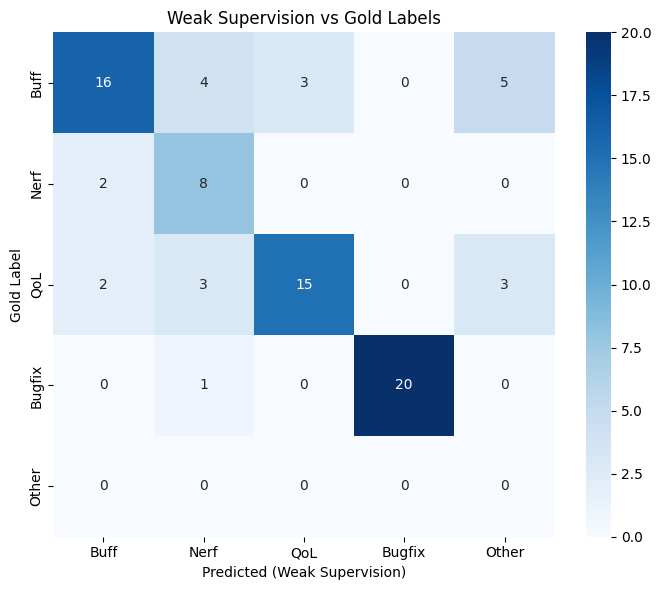

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(
    gold_df["gold_label"],
    gold_df["auto_label"],
    labels=labels
)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=labels,
    yticklabels=labels,
    cmap="Blues"
)
plt.xlabel("Predicted (Weak Supervision)")
plt.ylabel("Gold Label")
plt.title("Weak Supervision vs Gold Labels")
plt.tight_layout()
plt.show()


In [49]:
errors = gold_df[gold_df["auto_label"] != gold_df["gold_label"]]

errors.groupby(
    ["gold_label", "auto_label"]
).size().sort_values(ascending=False).head(10)


gold_label  auto_label
Buff        Other         5
            Nerf          4
            QoL           3
QoL         Other         3
            Nerf          3
            Buff          2
Nerf        Buff          2
Bugfix      Nerf          1
Qol         QoL           1
dtype: int64